# plot maps of oxygen change

In [1]:
%matplotlib inline
from config_calc import *

import matplotlib
import matplotlib.pyplot as plt
from cartopy.util import add_cyclic_point
import matplotlib.gridspec as gridspec
plt.rcParams['mathtext.default']='regular'

import cmocean
import plot_tools
import proc_cesm_le

plot_grid_vars = ['TLAT','TLONG','KMT','TAREA','ULAT','ULONG','UAREA',
                  'z_t','z_t_150m','z_w','dz',
                  'area_sum','vol_sum','year','lat_t','lat_t_edges']

### read the CESM-LE data

In [2]:
%%time
varlist = ['O2','AOU']
op = 'ann_dft'
tr85a = {}
for v in varlist:
    file_in = os.path.join(diro['work'],'tr85.avg.%s.%s.1920-2100.nc'%(op,v))
    print('reading %s'%file_in)
    ds = xr.open_dataset(file_in,decode_times=False,decode_coords=False)
    tr85a = xr.merge((tr85a,ds))
tr85a = tr85a.drop([k for k in tr85a if k not in plot_grid_vars and k not in varlist])

v = 'O2sat'
tr85a[v] = tr85a['AOU'] + tr85a['O2']
varlist.append(v) 
print tr85a

reading /glade/scratch/mclong/calcs/iucn-ch/work/tr85.avg.ann_dft.O2.1920-2100.nc
reading /glade/scratch/mclong/calcs/iucn-ch/work/tr85.avg.ann_dft.AOU.1920-2100.nc


<xarray.Dataset>
Dimensions:   (nlat: 384, nlon: 320, time: 181, z_t: 60, z_t_150m: 15, z_w: 60)
Coordinates:
  * z_t       (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 4.5e+03 5.5e+03 ...
  * z_t_150m  (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 ...
  * z_w       (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 ...
Dimensions without coordinates: nlat, nlon, time
Data variables:
    O2        (time, z_t, nlat, nlon) float32 nan nan nan nan nan nan nan ...
    KMT       (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TAREA     (nlat, nlon) float64 1.125e+13 1.125e+13 1.124e+13 1.124e+13 ...
    TLAT      (nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 -79.22 -79.22 ...
    TLONG     (nlat, nlon) float64 320.6 321.7 322.8 323.9 325.1 326.2 327.3 ...
    UAREA     (nlat, nlon) float64 1.423e+13 1.423e+13 1.423e+13 1.423e+13 ...
    ULAT      (nlat, nlon) float64 -78.95 -78.95 -78.95 -78.95 -78.95 -78.95 ...
    ULONG     (nlat, nlon) float6

### compute baseline mean

In [3]:
%%time
baselinea = tr85a.isel(time=slice(0,20)).mean(dim='time')
print baselinea

<xarray.Dataset>
Dimensions:   (nlat: 384, nlon: 320, z_t: 60, z_t_150m: 15, z_w: 60)
Coordinates:
  * z_t       (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 4.5e+03 5.5e+03 ...
  * z_t_150m  (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 ...
  * z_w       (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 ...
Dimensions without coordinates: nlat, nlon
Data variables:
    O2        (z_t, nlat, nlon) float32 nan nan nan nan nan nan nan nan nan ...
    KMT       (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TAREA     (nlat, nlon) float64 1.125e+13 1.125e+13 1.124e+13 1.124e+13 ...
    TLAT      (nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 -79.22 -79.22 ...
    TLONG     (nlat, nlon) float64 320.6 321.7 322.8 323.9 325.1 326.2 327.3 ...
    UAREA     (nlat, nlon) float64 1.423e+13 1.423e+13 1.423e+13 1.423e+13 ...
    ULAT      (nlat, nlon) float64 -78.95 -78.95 -78.95 -78.95 -78.95 -78.95 ...
    ULONG     (nlat, nlon) float64 321.1 322.3 3

### compute difference at 2100

In [4]:
delta = tr85a.isel(time=-1) - baselinea
delta = delta.drop([k for k in plot_grid_vars if k in delta])
for v in plot_grid_vars:
    if v in tr85a:
        delta[v] = tr85a[v]
print delta

<xarray.Dataset>
Dimensions:   (nlat: 384, nlon: 320, z_t: 60, z_t_150m: 15, z_w: 60)
Coordinates:
  * z_t       (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 4.5e+03 5.5e+03 ...
  * z_t_150m  (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 ...
  * z_w       (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 ...
Dimensions without coordinates: nlat, nlon
Data variables:
    O2        (z_t, nlat, nlon) float32 nan nan nan nan nan nan nan nan nan ...
    AOU       (z_t, nlat, nlon) float32 nan nan nan nan nan nan nan nan nan ...
    O2sat     (z_t, nlat, nlon) float32 nan nan nan nan nan nan nan nan nan ...
    TLAT      (nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 -79.22 -79.22 ...
    TLONG     (nlat, nlon) float64 320.6 321.7 322.8 323.9 325.1 326.2 327.3 ...
    KMT       (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TAREA     (nlat, nlon) float64 1.125e+13 1.125e+13 1.124e+13 1.124e+13 ...
    ULAT      (nlat, nlon) float64 -78.95 -78.95

In [5]:
%%time
tr85a = tr85a.compute()
delta = delta.compute()
baselinea = baselinea.compute()

CPU times: user 3 ms, sys: 6.66 s, total: 6.66 s
Wall time: 15.1 s


### compute thermocline averages

set up a region mask that is zero everywhere except in the 200-600 m range in valid ocean points

CPU times: user 226 ms, sys: 39 ms, total: 265 ms
Wall time: 277 ms


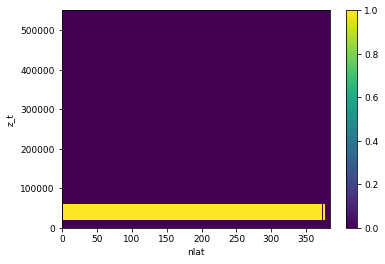

In [6]:
%%time
nz = tr85a.z_t.shape[0]
nlat = tr85a.KMT.shape[0]
nlon = tr85a.KMT.shape[1]
zmask = xr.DataArray(np.ones(nz),dims='z_t')

rmask = xr.DataArray(np.zeros((nz,nlat,nlon)),dims=('z_t','nlat','nlon'))
rmask[:,:,:] = np.where(tr85a.KMT > 0, 1., 0.)

zmask = (tr85a.dz.where( (200e2<=tr85a.z_t)&(tr85a.z_t<=600e2) ) / tr85a.dz.where( (200e2<=tr85a.z_t)&(tr85a.z_t<=600e2)) ).fillna(0.)
rmask = rmask * zmask
rmask[:,:,200].plot()

compute the spatial mean over the region mask, average in depth

In [7]:
%%time
tr85_tc = et.pop_calc_spatial_mean(delta.copy(),avg_over_dims=['z_t'],region_mask=rmask)
baseline_tc = et.pop_calc_spatial_mean(baselinea.copy(),avg_over_dims=['z_t'],region_mask=rmask)
print tr85_tc
print baseline_tc

computing mean: O2
computing ocean volume


applying mask
computing volume weights


/glade/p/work/mclong/miniconda2/lib/python2.7/site-packages/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in divide
  if not reflexive


computing mean: AOU
computing mean: O2sat


computing mean: O2
computing ocean volume


applying mask
computing volume weights


computing mean: AOU
computing mean: O2sat


<xarray.Dataset>
Dimensions:   (nlat: 384, nlon: 320, z_t: 60, z_t_150m: 15, z_w: 60)
Coordinates:
  * z_t       (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 4.5e+03 5.5e+03 ...
  * z_t_150m  (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 ...
  * z_w       (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 ...
Dimensions without coordinates: nlat, nlon
Data variables:
    O2        (nlat, nlon) float64 nan nan nan nan nan nan nan nan nan nan ...
    AOU       (nlat, nlon) float64 nan nan nan nan nan nan nan nan nan nan ...
    O2sat     (nlat, nlon) float64 nan nan nan nan nan nan nan nan nan nan ...
    TLAT      (nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 -79.22 -79.22 ...
    TLONG     (nlat, nlon) float64 320.6 321.7 322.8 323.9 325.1 326.2 327.3 ...
    KMT       (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TAREA     (nlat, nlon) float64 1.125e+13 1.125e+13 1.124e+13 1.124e+13 ...
    ULAT      (nlat, nlon) float64 -78.95 -78.95 -7

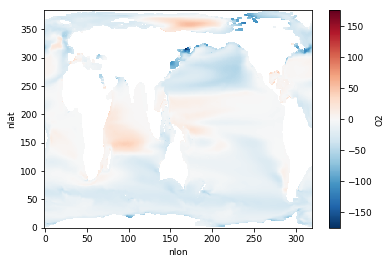

In [8]:
tr85_tc.O2.plot()

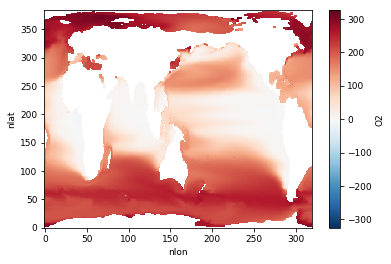

In [9]:
baseline_tc.O2.plot()

### plot mean O2 and change

In [10]:
LON = [[]]*2
LAT = [[]]*2
Z = [[]]*2

lon = tr85a.TLONG.values
lat = tr85a.TLAT.values
field = baseline_tc.O2.values
LON[0],LAT[0],Z[0]= plot_tools.adjust_pop_grid(lon,lat,field)

lon = tr85a.TLONG.values
lat = tr85a.TLAT.values
field = tr85_tc.O2.values
LON[1],LAT[1],Z[1]= plot_tools.adjust_pop_grid(lon,lat,field)

for lon,lat,z in zip(LON,LAT,Z):
    print z.shape
    print lon.shape
    print lat.shape

(384, 321)
(384, 321)
(384, 321)
(384, 321)
(384, 321)
(384, 321)


initial plot size (display units): 6.98,3.54
Adjusting fig size:
	(W,H in): 10.00,4.00 --> 8.03,6.73
new plot size: 5.61,3.57


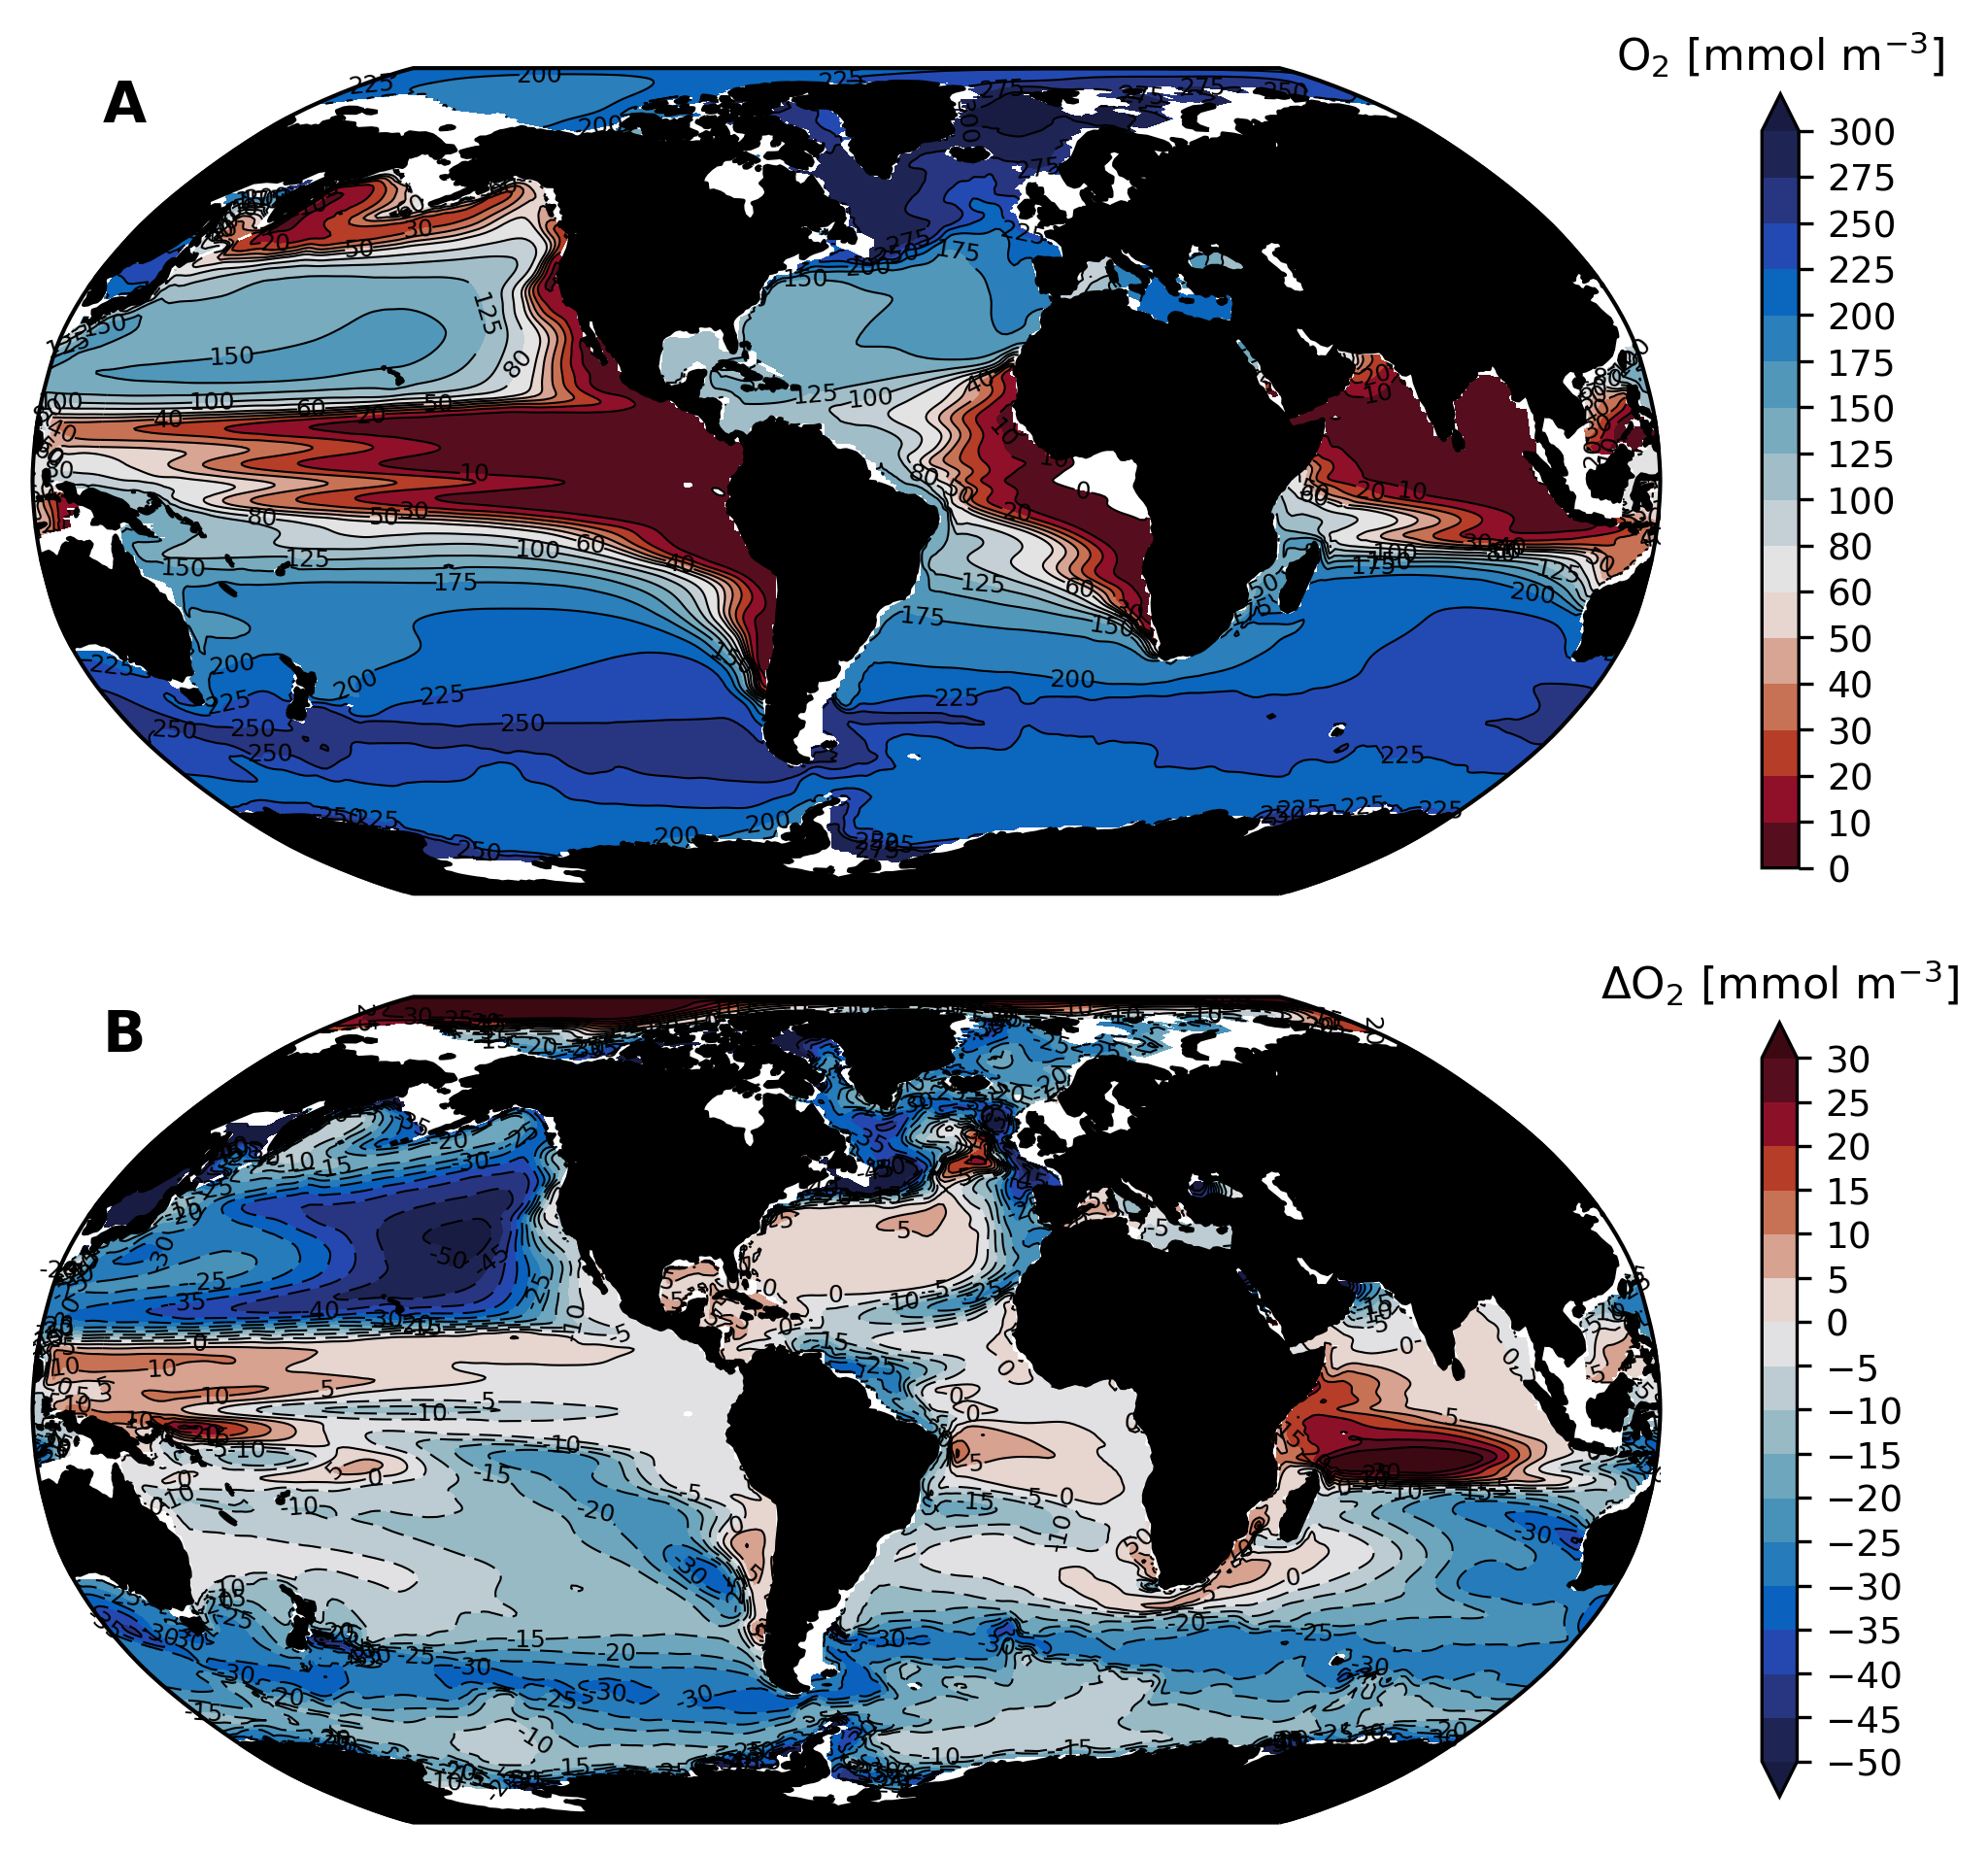

In [11]:
plot_name = os.path.join(diro['fig'],'cesm-thermocline-o2-change.pdf')

matplotlib.rcParams['contour.negative_linestyle'] = 'dashed'

fig=plt.figure(figsize=(10, 4),dpi=300)
gs = gridspec.GridSpec(2,1)


obj = [[]]*2
ax = []
for i,(lon,lat,z) in enumerate(zip(LON,LAT,Z)):

    if i == 0:
        levels = np.arange(-2.,34.,2.)
        units = 'O$_2$ [mmol m$^{-3}$]'
        norm = plot_tools.MidPointNorm(midpoint=60.)
        contour_specs = {'levels':[0,10,20,30,40,50,60,80,100,125,150,175,200,225,250,275,300],
                            'cmap':cmocean.cm.balance_r,
                            'norm':norm,'extend':'max'}
    else:
        levels = np.arange(-50.,35.,5)
        norm = plot_tools.MidPointNorm(midpoint=0)
        units = '$\Delta$O$_2$ [mmol m$^{-3}$]'
        contour_specs = {'levels':levels,'cmap':cmocean.cm.balance,'norm':norm,'extend':'both'}
          
    obj[i] = plot_tools.canvas_map_contour_overlay(lon,lat,z,
                                                   contour_specs,
                                                   units = units,
                                                   fig=fig,
                                                   gridspec=gs,
                                                   row=i,col=0)
    ax.append(obj[i]['ax'])

gridspec_kwargs = {'hspace' : -0.1,
                   'wspace' : 0.05,
                   'left' : 0.,
                   'right' : 0.87,
                   'bottom' : 0.,
                   'top' : 1.}
fgsz = plot_tools.plotgrid(fig, gs, ax, [2,1],gridspec_kwargs)

alp = [chr(i).upper() for i in range(97,97+26)]
for i,axi in enumerate(ax):
    p = axi.get_position()
    y = p.y1-0.08
    fig.text(0.03,y,'%s'%alp[i],
             fontsize=14.,
             fontweight = 'semibold')
plt.savefig(plot_name,dpi=300,bbox_inches='tight')

### plot solubility and AOU components

In [12]:
LON = [[]]*2
LAT = [[]]*2
Z = [[]]*2
lon = tr85a.TLONG.values
lat = tr85a.TLAT.values
field = tr85_tc.O2sat.values
LON[0],LAT[0],Z[0]= plot_tools.adjust_pop_grid(lon,lat,field)

lon = tr85a.TLONG.values
lat = tr85a.TLAT.values
field = -tr85_tc.AOU.values
LON[1],LAT[1],Z[1]= plot_tools.adjust_pop_grid(lon,lat,field)

for lon,lat,z in zip(LON,LAT,Z):
    print z.shape
    print lon.shape
    print lat.shape

(384, 321)
(384, 321)
(384, 321)
(384, 321)
(384, 321)
(384, 321)


/glade/p/work/mclong/miniconda2/lib/python2.7/site-packages/matplotlib/contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


initial plot size (display units): 6.98,3.54
Adjusting fig size:
	(W,H in): 10.00,4.00 --> 8.03,6.73
new plot size: 5.61,3.57


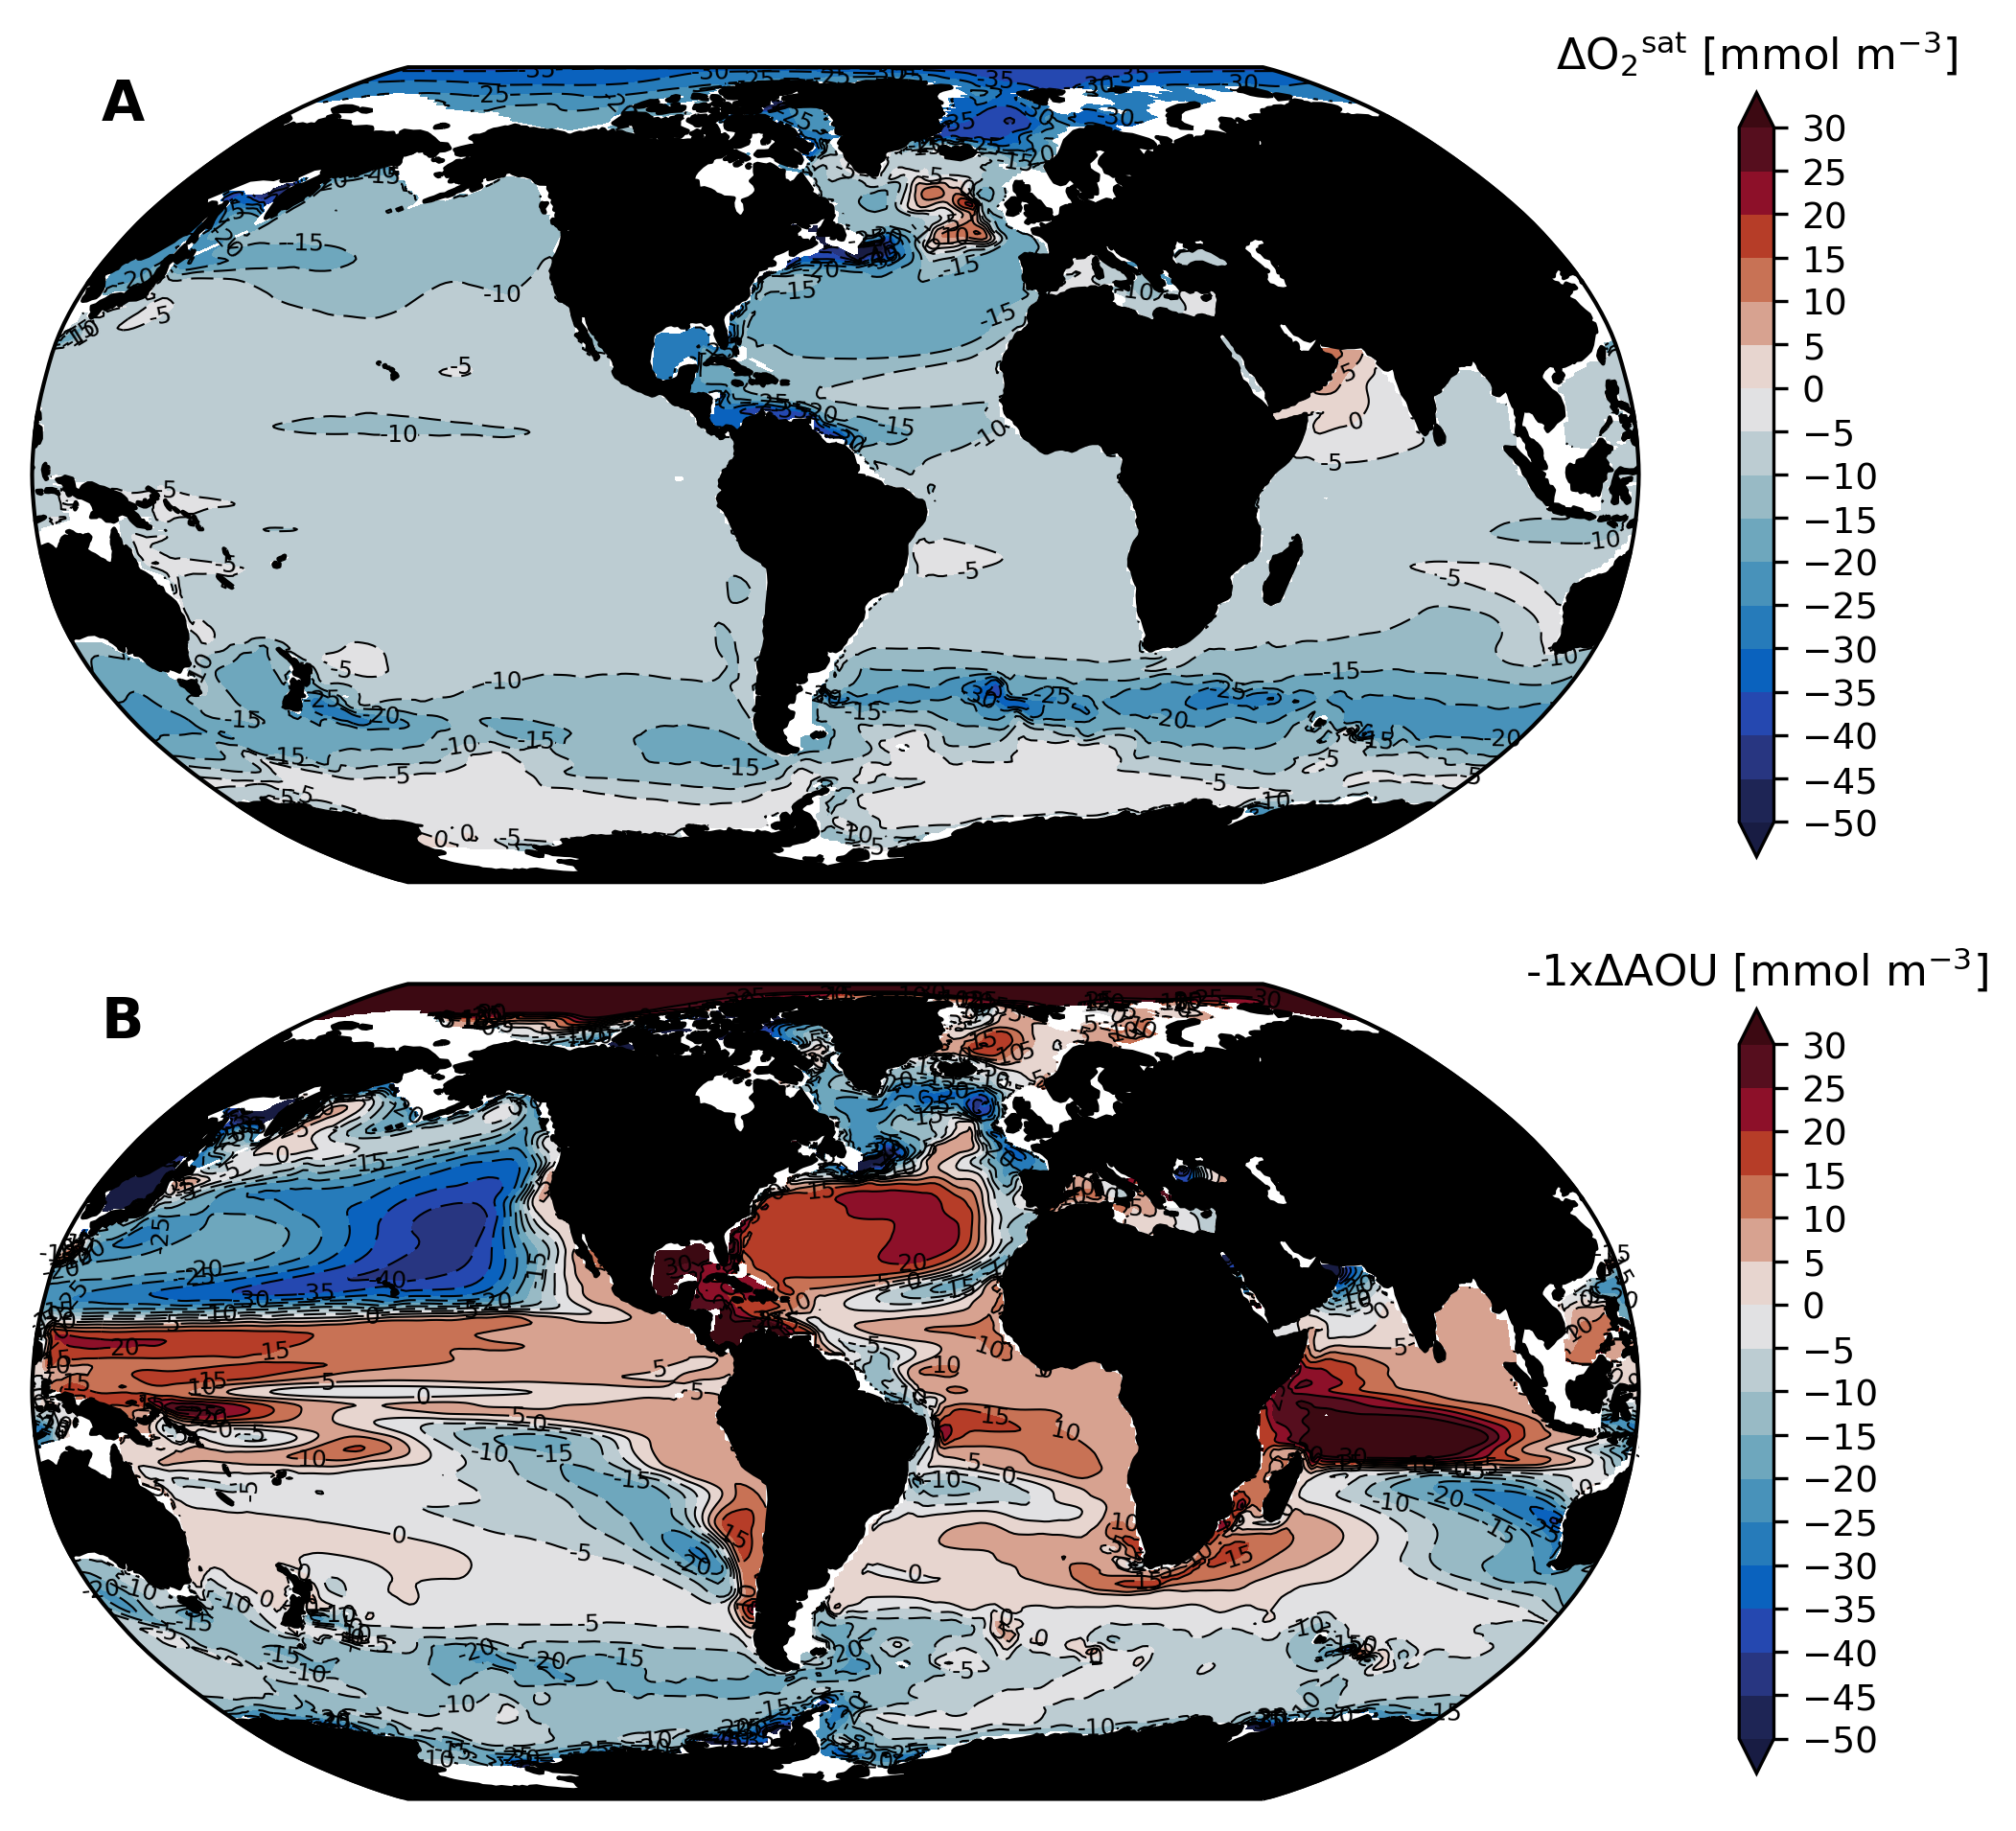

In [13]:
plot_name = os.path.join(diro['fig'],'cesm-thermocline-o2-change-sat-aou.pdf')

matplotlib.rcParams['contour.negative_linestyle'] = 'dashed'

fig=plt.figure(figsize=(10, 4),dpi=300)
gs = gridspec.GridSpec(2,1)


obj = [[]]*2
ax = []
for i,(lon,lat,z) in enumerate(zip(LON,LAT,Z)):

    norm = plot_tools.MidPointNorm(midpoint=0) 
    if i == 0:
        units = '$\Delta$O${_2}^{sat}$ [mmol m$^{-3}$]'  
        levels = np.arange(-50.,35.,5)
    else:
        units = '-1x$\Delta$$AOU$ [mmol m$^{-3}$]'       
        levels = np.arange(-50.,35.,5)

    contour_specs = {'levels':levels,'cmap':cmocean.cm.balance,'norm':norm,'extend':'both'}

    obj[i] = plot_tools.canvas_map_contour_overlay(lon,lat,z,
                                                   contour_specs,
                                                   units = units,
                                                   fig=fig,
                                                   gridspec=gs,
                                                   row=i,col=0)
    ax.append(obj[i]['ax'])

gridspec_kwargs = {'hspace' : -0.1,
                   'wspace' : 0.05,
                   'left' : 0.,
                   'right' : 0.87,
                   'bottom' : 0.,
                   'top' : 1.}
fgsz = plot_tools.plotgrid(fig, gs, ax, [2,1],gridspec_kwargs)

alp = [chr(i).upper() for i in range(97,97+26)]
for i,axi in enumerate(ax):
    p = axi.get_position()
    y = p.y1-0.08
    fig.text(0.03,y,'%s'%alp[i],
             fontsize=14.,
             fontweight = 'semibold')
plt.savefig(plot_name,dpi=300,bbox_inches='tight')